# NDVI - Tumbarumba

A timeseries of __NDVI__ change at the tumbarumba study site from __Nov 2019 - April 2021__ using __Sentinal 2 Imagery__

This study measures the presence of vegetation through either the `normalised difference vegetation index (NDVI)`.
The index that will be used is dictated by the `veg_proxy` parameter that was set in the "Analysis parameters" section.

The normalised difference vegetation index (NDVI) requires the `red` and `nir` (near-infra red) bands. 
The formula is

$$
\begin{aligned}
\text{NDVI} & = \frac{(\text{NIR} - \text{Red})}{(\text{NIR} + \text{Red})} \\
\end{aligned}
$$

Both indices are available through the [calculate_indices](../Frequently_used_code/Calculating_band_indices.ipynb) function, imported from [dea_bandindices.py](../Scripts/dea_bandindices.py).
Here, we use `collection='ga_s2_1'` since we're working with Sentinel-2 data.

### Packages

In [4]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import os

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.datahandling import load_ard
from dea_tools.plotting import rgb, display_map
from dea_tools.bandindices import calculate_indices
from dea_tools.temporal import xr_phenology

In [5]:
dc = datacube.Datacube(app='Vegetation_phenology') ## Connects to the datacube

### Input Analysis Paramaters

In [6]:
# Set the vegetation proxy to use
veg_proxy = 'NDVI'

# Define area of interest
lat = -35.655958
lon = 148.151751
lon_buffer = 0.005
lat_buffer = 0.005

# Set the range of dates for the analysis
#time_range = ('2018-01', '2018-06')
time_range = ('2016-01', '2021-05')

In [7]:
# Combine central lat,lon with buffer to get area of interest
lat_range = (lat - lat_buffer, lat + lat_buffer)
lon_range = (lon - lon_buffer, lon + lon_buffer)

### Selected location for NDVI Analysis

In [8]:
# Combine central lat,lon with buffer to get area of interest
lat_range = (lat - lat_buffer, lat + lat_buffer)
lon_range = (lon - lon_buffer, lon + lon_buffer)
display_map(x=lon_range, y=lat_range)

### Cloud masking requirements
Aim is to get imagery that are a min of 75% cloud free

In [9]:
# Create a reusable query
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
    'measurements': ['nbart_red', 'nbart_green', 'nbart_blue', 'nbart_nir_1'],
    'resolution': (-20, 20),
    'output_crs': 'epsg:3577',
    'group_by': 'solar_day'
}

# Load available data from Sentinel 2
ds = load_ard(
    dc=dc,
    products=['s2a_ard_granule', 's2b_ard_granule'],
    min_gooddata=0.75,
    **query,
)

print(ds)

Finding datasets
    s2a_ard_granule
    s2b_ard_granule
Counting good quality pixels for each time step
Filtering to 271 out of 634 time steps with at least 75.0% good quality pixels
Applying pixel quality/cloud mask
Loading 271 time steps
<xarray.Dataset>
Dimensions:      (time: 271, y: 62, x: 52)
Coordinates:
  * time         (time) datetime64[ns] 2016-01-01T00:09:15.704000 ... 2021-05...
  * y            (y) float64 -3.987e+06 -3.987e+06 ... -3.988e+06 -3.988e+06
  * x            (x) float64 1.457e+06 1.457e+06 ... 1.458e+06 1.458e+06
    spatial_ref  int32 3577
Data variables:
    nbart_red    (time, y, x) float32 572.0 541.0 540.0 ... 365.0 432.0 331.0
    nbart_green  (time, y, x) float32 564.0 553.0 528.0 ... 244.0 309.0 236.0
    nbart_blue   (time, y, x) float32 496.0 466.0 482.0 ... 104.0 178.0 101.0
    nbart_nir_1  (time, y, x) float32 2.23e+03 2.014e+03 ... 1.488e+03 1.637e+03
Attributes:
    crs:           epsg:3577
    grid_mapping:  spatial_ref


In [10]:
ds.time.head(50)

<xarray.DataArray 'time' (time: 50)>
array(['2016-01-01T00:09:15.704000000', '2016-01-31T00:02:38.456000000',
       '2016-02-10T00:06:25.461000000', '2016-02-13T00:12:09.456000000',
       '2016-03-14T00:12:09.462000000', '2016-04-13T00:12:12.456000000',
       '2016-04-23T00:16:28.458000000', '2016-06-02T00:15:58.535000000',
       '2016-06-12T00:16:29.460000000', '2016-08-01T00:12:53.537000000',
       '2016-08-11T00:16:29.460000000', '2016-10-07T00:04:16.123000000',
       '2016-10-27T00:04:38.768000000', '2016-11-16T00:06:36.220000000',
       '2016-11-19T00:12:43.929000000', '2016-11-26T00:06:32.613000000',
       '2016-11-29T00:16:23.459000000', '2017-01-15T00:02:42.541000000',
       '2017-01-28T00:15:06.849000000', '2017-02-14T00:02:12.455000000',
       '2017-02-24T00:05:59.752000000', '2017-02-27T00:16:19.462000000',
       '2017-03-09T00:13:46.479000000', '2017-03-19T00:16:17.459000000',
       '2017-03-26T00:06:23.464000000', '2017-03-29T00:12:08.456000000',
       '2017-04-05T00:02:47.929000000', '2017-04-15T00:06:28.462000000',
       '2017-04-18T00:12:56.756000000', '2017-05-08T00:12:15.461000000',
       '2017-06-07T00:16:27.458000000', '2017-07-22T00:16:33.222000000',
       '2017-07-27T00:16:19.786000000', '2017-07-29T00:05:43.101000000',
       '2017-08-26T00:16:26.456000000', '2017-08-31T00:13:47.888000000',
       '2017-09-20T00:13:52.711000000', '2017-10-02T00:02:37.459000000',
       '2017-10-10T00:15:45.748000000', '2017-10-15T00:14:55.754000000',
       '2017-10-17T00:02:26.462000000', '2017-11-01T00:06:28.460000000',
       '2017-11-04T00:14:55.754000000', '2017-11-09T00:12:14.831000000',
       '2017-11-11T00:02:38.455000000', '2017-11-24T00:12:46.475000000',
       '2017-12-09T00:13:42.477000000', '2017-12-26T00:02:49.749000000',
       '2018-01-05T00:02:32.457000000', '2018-01-10T00:02:32.462000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2016-01-01T00:09:15.704000 ... 2018-01...
    spatial_ref  int32 3577
Attributes:
    units:    seconds since 1970-01-01 00:00:00

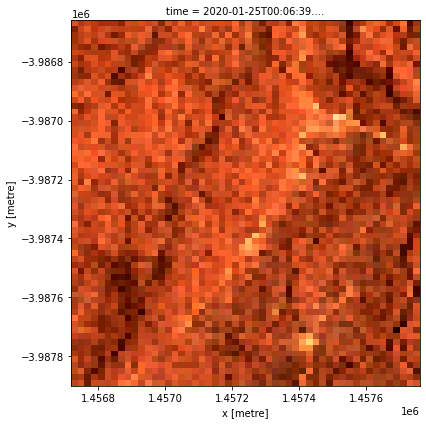

In [31]:
# print a selection of the imagery to check for consistency
timestep = ds.sel(time = '2020-01-25')
#print(timestep)
rgb(timestep, col = 'time', col_wrap=3) # Modify index dep on images selected above

### Compute NDVI over the timeseries

In [20]:
# Calculate the chosen vegetation proxy index and add it to the loaded data set
ds = calculate_indices(ds, index=veg_proxy, collection='ga_s2_1')

# Save the NDVI to the dask cluster
ds[veg_proxy] = ds[veg_proxy]

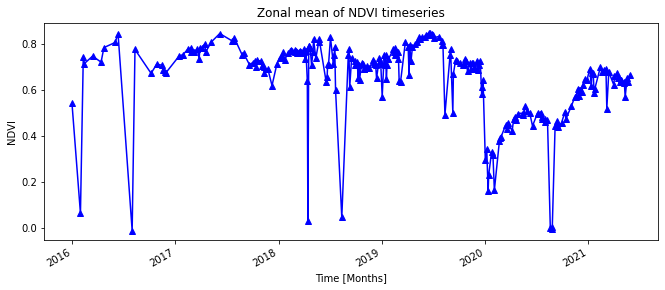

In [21]:
ds[veg_proxy].mean(['x', 'y']).plot.line('b-^', figsize=(11, 4))
plt.title('Zonal mean of NDVI timeseries')
plt.xlabel('Time [Months]');

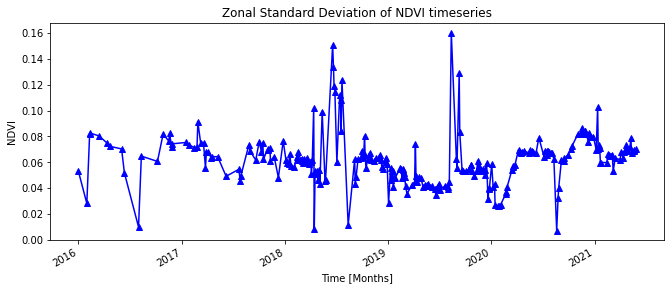

In [22]:
ds[veg_proxy].std(['x', 'y']).plot.line('b-^', figsize=(11, 4))
plt.title('Zonal Standard Deviation of NDVI timeseries')
plt.xlabel('Time [Months]');

__Smooth the timeseries to remove incoonsistencies__

In [56]:
resample_period='2W'
window=4

veg_smooth=ds[veg_proxy].resample(time=resample_period).median().rolling(time=window, min_periods=1).mean()

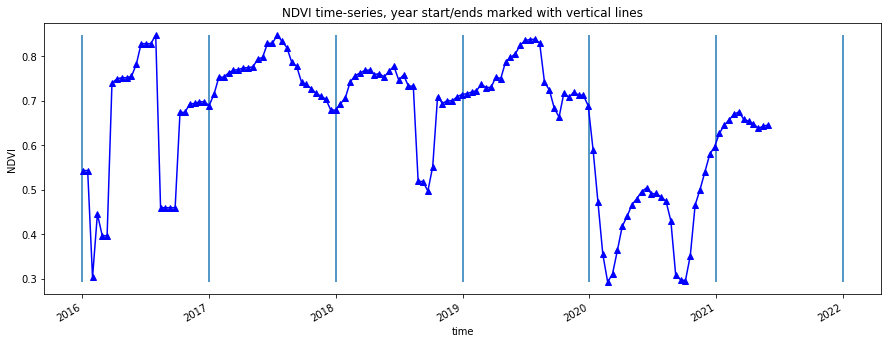

In [57]:
veg_smooth_1D = veg_smooth.mean(['x', 'y'])
veg_smooth_1D.plot.line('b-^', figsize=(15,5))
_max=veg_smooth_1D.max()
_min=veg_smooth_1D.min()
plt.vlines(np.datetime64('2016-01-01'), ymin=_min, ymax=_max)
plt.vlines(np.datetime64('2017-01-01'), ymin=_min, ymax=_max)
plt.vlines(np.datetime64('2018-01-01'), ymin=_min, ymax=_max)
plt.vlines(np.datetime64('2019-01-01'), ymin=_min, ymax=_max)
plt.vlines(np.datetime64('2020-01-01'), ymin=_min, ymax=_max)
plt.vlines(np.datetime64('2021-01-01'), ymin=_min, ymax=_max)
plt.vlines(np.datetime64('2022-01-01'), ymin=_min, ymax=_max)
plt.title('NDVI time-series, year start/ends marked with vertical lines')
plt.ylabel('NDVI');

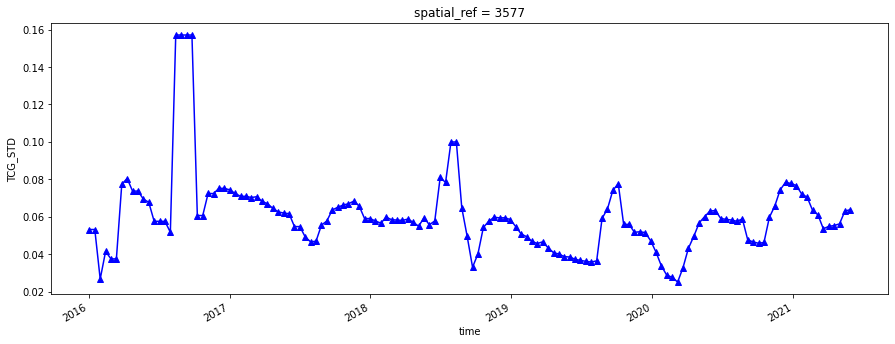

In [25]:
veg_smooth_1D_STD = veg_smooth.std(['x', 'y'])
veg_smooth_1D_STD.plot.line('b-^', figsize=(15,5))
_max=veg_smooth_1D_STD.max()
_min=veg_smooth_1D_STD.min()
plt.ylabel('TCG_STD');

## Exporting NDVI

Modify time for export

In [26]:
veg_smooth_time = veg_smooth.time
arr = np.array(veg_smooth_time, dtype='datetime64[s]')

Exporting EVI

In [27]:
df = pd.DataFrame(veg_smooth_1D, columns = ['NDVI'])

In [28]:
df['time'] = arr

In [29]:
from numpy import savetxt
df.to_csv('NDVI_smoothed_mean.csv')

In [30]:
df2 = pd.DataFrame(veg_smooth_1D_STD, columns = ['NDVI_STD'])

In [31]:
df2['time'] = arr

In [32]:
from numpy import savetxt
df2.to_csv('NDVI_smoothed_std.csv')

### Anomoly investigation
View imagery for selected time periof of September 2020 peak in attempt to determine reason for anomoly

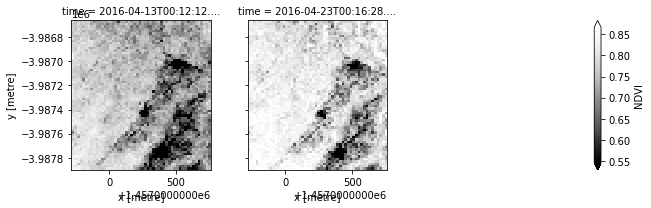

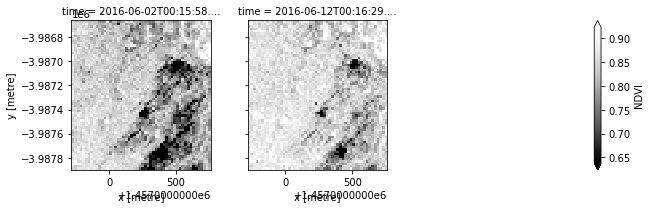

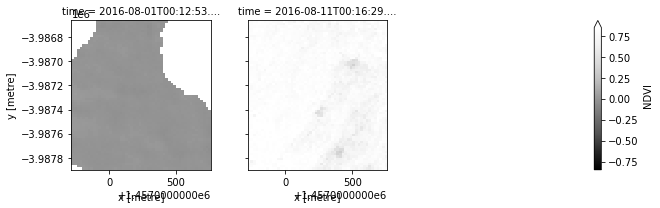

In [34]:
# print a selection of the imagery to check for consistency
timestep1 = ds[veg_proxy].sel(time = '2016-04')
timestep2 = ds[veg_proxy].sel(time = '2016-06')
timestep3 = ds[veg_proxy].sel(time = '2016-08')
#print(timestep)
timestep1.plot(cmap = "Greys_r", robust = True, col = 'time', col_wrap=3)
timestep2.plot(cmap = "Greys_r", robust = True, col = 'time', col_wrap=3)
timestep3.plot(cmap = "Greys_r", robust = True, col = 'time', col_wrap=3)

### Analysis

The NDVI variance is as expected following the bushfire in Dec 2019. It is interesting that that recovery 
seems immediate whilst looking at NDVI. It can also be seen that there is a lare dip in the NDVI signal in late August of 2020. the reason for this dip must therefore be investigated further by running the NDVI Analysis over a smaller time period and examining the imagery to find any reasons for the discrepency.